In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
import plotly.express as px

In [66]:
iris = pd.read_csv('iris.csv')

In [67]:
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [68]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [70]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [71]:
X = iris.iloc[: , :-1].values
y = iris.iloc[: , -1].values

In [72]:
fig = px.scatter(data_frame=iris, x='sepal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [73]:
fig = px.scatter(data_frame=iris, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [74]:
fig = px.scatter(data_frame=iris, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [75]:
fig = px.scatter(data_frame=iris, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [76]:
scaler= StandardScaler()
scaled_features= scaler.fit_transform(X)

In [77]:
import scipy.cluster.hierarchy as sch

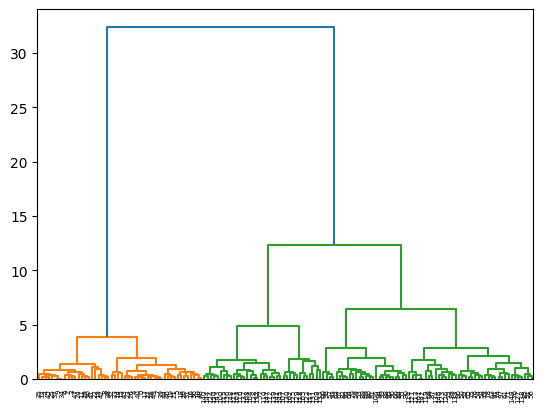

In [78]:
dendogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

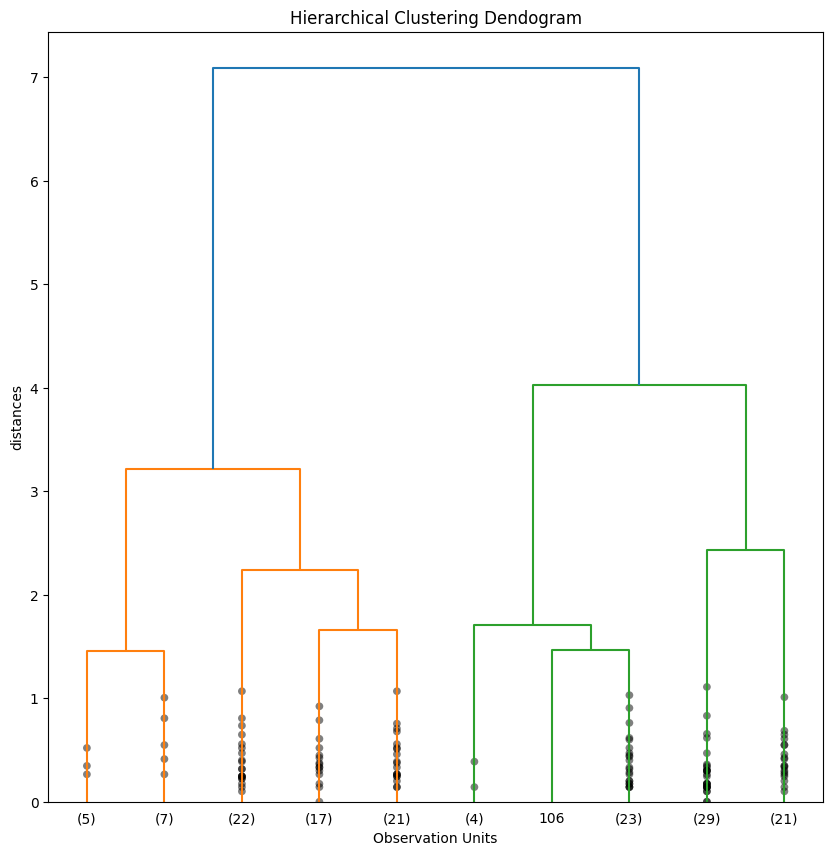

In [79]:

plt.figure(figsize=(10,10))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("distances")
dendrogram(linkage(X,"complete"),
          leaf_font_size=10,
          truncate_mode="lastp",
           p=10,
           show_contracted=True)
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [81]:
cluster_labels = agg_model.fit_predict(scaled_features)

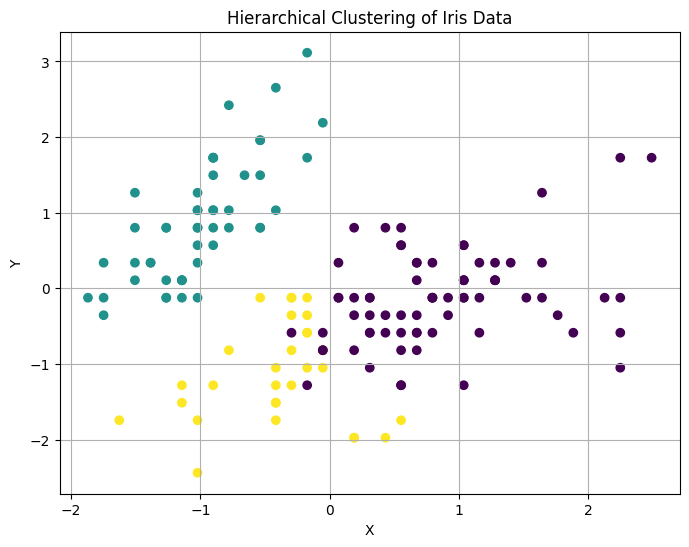

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title("Hierarchical Clustering of Iris Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [83]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(iris.species,cluster_labels)
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 0.615
